<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/wurifahtugas5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('areview.csv')

df.head(10)

tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...
5  1956968477       worry  Re-pinging @ghostridah14: why didn't you go to...
6  1956968487     sadness  I should be sleep, but im not! thinking about ...
7  1956968636       worry               Hmmm. http://www.djhero.com/ is down
8  1956969035     sadness            @charviray Charlene my love. I miss you
9  1956969172     sadness         @kelcouch I'm sorry  at least it's Friday?

In [2]:
#     case folding

df['content'] = df['content'].str.lower()

print('Case Folding Result : \n')
print(df['content'].head(10))

Case Folding Result : 

0    @tiffanylue i know  i was listenin to bad habi...
1    layin n bed with a headache  ughhhh...waitin o...
2                  funeral ceremony...gloomy friday...
3                 wants to hang out with friends soon!
4    @dannycastillo we want to trade with someone w...
5    re-pinging @ghostridah14: why didn't you go to...
6    i should be sleep, but im not! thinking about ...
7                 hmmm. http://www.djhero.com/ is down
8              @charviray charlene my love. i miss you
9           @kelcouch i'm sorry  at least it's friday?
Name: content, dtype: object


In [5]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re,string,unicodedata
from string import punctuation
import string
from nltk.probability import FreqDist
nltk.download("punkt")

# tokenizing
def hapus_kurung(text):
  return re.sub('\[[^]]*\]','',text)
def hapus_url(text):
  return re.sub(r'@http\S+', '',text)
def remove_special_characters(text, remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text)
  return text

nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
  final_text = []
  for i in text.split():
    if i.strip().lower() not in stop and i.strip().lower().isalpha():
      final_text.append(i.strip().lower())
  return " ".join(final_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df['content']

0        @tiffanylue i know  i was listenin to bad habi...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4        @dannycastillo we want to trade with someone w...
                               ...                        
39995                                     @johnlloydtaylor
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998    @niariley wassup beautiful!!! follow me!!  pee...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [7]:
def clean_text(text):
  text = hapus_kurung(text)
  text = hapus_url(text)
  text = remove_special_characters(text, remove_digits=True)
  text = remove_stopwords(text)
  return text

df['content'] = df['content'].apply(clean_text)


In [8]:
df.tail(10)

tweet_id  sentiment                                            content
39990  1753918829    neutral                   shonali think lesson day luggage
39991  1753918846    neutral         lovelylisaj give link kimba diaries please
39992  1753918881    neutral  jasimmo ooo showing french skills lol things g...
39993  1753918892    neutral          haha yeah twitter many uses know ppl care
39994  1753918900  happiness                        succesfully following tayla
39995  1753918954    neutral                                    johnlloydtaylor
39996  1753919001       love                             happy mothers day love
39997  1753919005       love  happy mothers day mommies woman man long youre...
39998  1753919043  happiness  niariley wassup beautiful follow peep new hit ...
39999  1753919049       love  mopedronin bullet train tokyo gf visiting japa...

In [9]:
df.sentiment.replace("worry", 0 , inplace = True)
df.sentiment.replace("empty", 0 , inplace = True)
df.sentiment.replace("sadness", 0 , inplace = True)
df.sentiment.replace("hate", 0 , inplace = True)
df.sentiment.replace("neutral", 1 , inplace = True)
df.sentiment.replace("relief", 1 , inplace = True)
df.sentiment.replace("fun", 2 , inplace = True)
df.sentiment.replace("happiness", 2 , inplace = True)
df.sentiment.replace("love", 2 , inplace = True)
df.sentiment.replace("surprise", 2 , inplace = True)
df.sentiment.replace("enthusiasm", 2 , inplace = True)
df.tail(10)

tweet_id sentiment                                            content
39990  1753918829         1                   shonali think lesson day luggage
39991  1753918846         1         lovelylisaj give link kimba diaries please
39992  1753918881         1  jasimmo ooo showing french skills lol things g...
39993  1753918892         1          haha yeah twitter many uses know ppl care
39994  1753918900         2                        succesfully following tayla
39995  1753918954         1                                    johnlloydtaylor
39996  1753919001         2                             happy mothers day love
39997  1753919005         2  happy mothers day mommies woman man long youre...
39998  1753919043         2  niariley wassup beautiful follow peep new hit ...
39999  1753919049         2  mopedronin bullet train tokyo gf visiting japa...

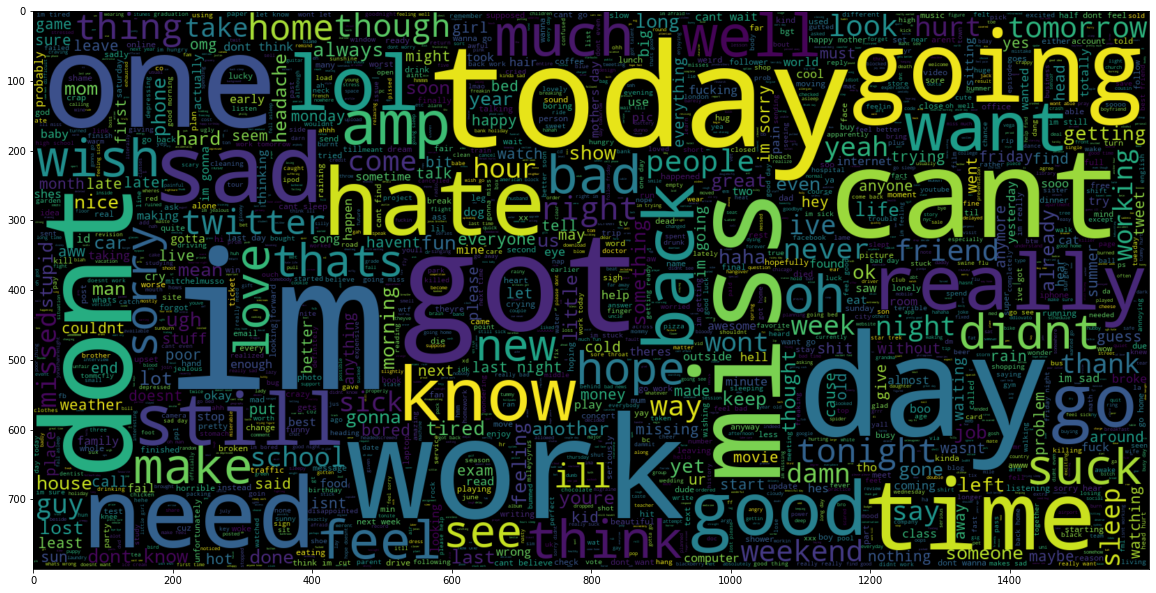

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width =1600, height = 800).generate(" ".join(df[df.sentiment == 0].content))
plt.imshow(wc , interpolation = 'bilinear')

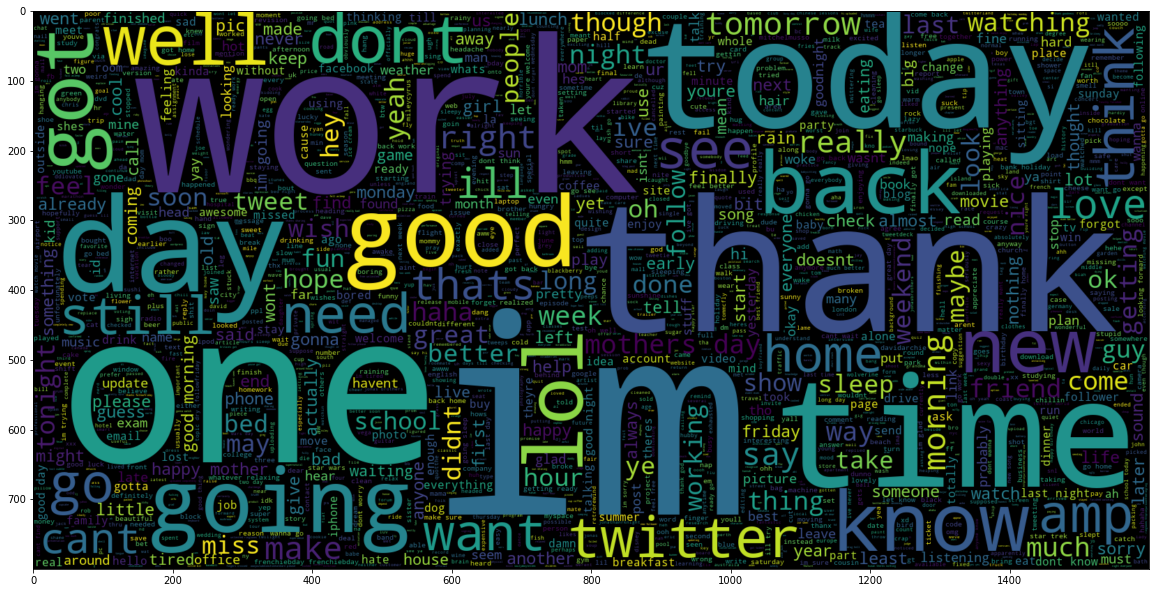

In [12]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width =1600, height = 800).generate(" ".join(df[df.sentiment == 1].content))
plt.imshow(wc , interpolation = 'bilinear')

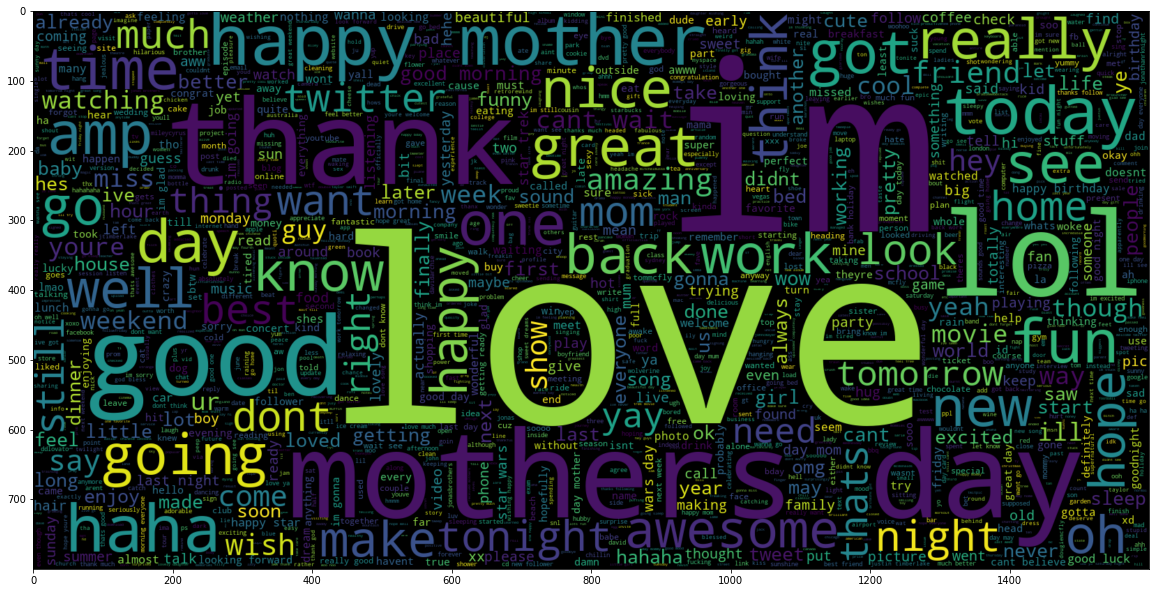

In [13]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width =1600, height = 800).generate(" ".join(df[df.sentiment == 2].content))
plt.imshow(wc , interpolation = 'bilinear')

In [14]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['tweet_tokens'] = df['content'].apply(word_tokenize_wrapper)

print(df['tweet_tokens'].head())

0    [tiffanylue, know, listenin, bad, habit, earli...
1        [layin, n, bed, headache, ughhhhwaitin, call]
2                    [funeral, ceremonygloomy, friday]
3                         [wants, hang, friends, soon]
4    [dannycastillo, want, trade, someone, houston,...
Name: tweet_tokens, dtype: object


In [15]:
from nltk.corpus import stopwords
nltk.download("stopwords")

def stopwords_removal(words):
  return [word for word in words if word not in stop]

df['tweet_tokens_WSW']= df['tweet_tokens'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# NLTK calc frequency distribution

def freqDist_wrapper(text):
  return FreqDist(text)

df['tweet_tokens_fdist'] = df['tweet_tokens'].apply(freqDist_wrapper)
print('Frequency Tokens: \n')
print(df['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens: 

0    [(tiffanylue, 1), (know, 1), (listenin, 1), (b...
1    [(layin, 1), (n, 1), (bed, 1), (headache, 1), ...
2     [(funeral, 1), (ceremonygloomy, 1), (friday, 1)]
3     [(wants, 1), (hang, 1), (friends, 1), (soon, 1)]
4    [(dannycastillo, 1), (want, 1), (trade, 1), (s...
Name: tweet_tokens_fdist, dtype: object


In [17]:
!pip3 install swifter
!pip3 install PySastrawi

     |████████████████████████████████| 280 kB 7.8 MB/s 
     |████████████████████████████████| 133 kB 63.4 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


     |████████████████████████████████| 210 kB 7.0 MB/s 


In [18]:
df.head()

tweet_id  ...                                 tweet_tokens_fdist
0  1956967341  ...  {'tiffanylue': 1, 'know': 1, 'listenin': 1, 'b...
1  1956967666  ...  {'layin': 1, 'n': 1, 'bed': 1, 'headache': 1, ...
2  1956967696  ...   {'funeral': 1, 'ceremonygloomy': 1, 'friday': 1}
3  1956967789  ...   {'wants': 1, 'hang': 1, 'friends': 1, 'soon': 1}
4  1956968416  ...  {'dannycastillo': 1, 'want': 1, 'trade': 1, 's...

[5 rows x 6 columns]

In [19]:
# import sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

#create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}

for document in df['tweet_tokens_WSW']:
  for term in document:
    if term not in term_dict:
      term_dict[term]= ' '


for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)


# apply stemmed term to dataframe
def get_stemmed_term(document):
  return [term_dict[term] for term in document]

df['tweet_tokens_stemmed'] = df['tweet_tokens_WSW'].swifter.apply(get_stemmed_term)

Pandas Apply:   0%|          | 0/40000 [00:00<?, ?it/s]

In [20]:
df.to_csv('Hasil_Prepocessing.csv')

In [21]:
!pip3 install -U scikit-learn

In [22]:
import pandas as pd
import numpy as np

df2 = pd.read_csv('Hasil_Prepocessing.csv', usecols=['tweet_tokens_stemmed'])
df2.columns = ['content']

df.head(10)

tweet_id  ...                               tweet_tokens_stemmed
0  1956967341  ...  [tiffanylue, know, listenin, bad, habit, earli...
1  1956967666  ...      [layin, n, bed, headache, ughhhhwaitin, call]
2  1956967696  ...                  [funeral, ceremonygloomy, friday]
3  1956967789  ...                       [wants, hang, friends, soon]
4  1956968416  ...  [dannycastillo, want, trade, someone, houston,...
5  1956968477  ...  [repinging, didnt, go, prom, bc, bf, didnt, li...
6  1956968487  ...  [sleep, im, thinking, old, friend, want, hes, ...
7  1956968636  ...                           [hmmm, httpwwwdjherocom]
8  1956969035  ...                  [charviray, charlene, love, miss]
9  1956969172  ...               [kelcouch, im, sorry, least, friday]

[10 rows x 7 columns]

In [23]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df2['content_list'] = df2['content'].apply(convert_text_list)

In [24]:
df2.head(10)

content                                       content_list
0  ['tiffanylue', 'know', 'listenin', 'bad', 'hab...  [tiffanylue, know, listenin, bad, habit, earli...
1  ['layin', 'n', 'bed', 'headache', 'ughhhhwaiti...      [layin, n, bed, headache, ughhhhwaitin, call]
2            ['funeral', 'ceremonygloomy', 'friday']                  [funeral, ceremonygloomy, friday]
3               ['wants', 'hang', 'friends', 'soon']                       [wants, hang, friends, soon]
4  ['dannycastillo', 'want', 'trade', 'someone', ...  [dannycastillo, want, trade, someone, houston,...
5  ['repinging', 'didnt', 'go', 'prom', 'bc', 'bf...  [repinging, didnt, go, prom, bc, bf, didnt, li...
6  ['sleep', 'im', 'thinking', 'old', 'friend', '...  [sleep, im, thinking, old, friend, want, hes, ...
7                       ['hmmm', 'httpwwwdjherocom']                           [hmmm, httpwwwdjherocom]
8          ['charviray', 'charlene', 'love', 'miss']                  [charviray, charlene, love, miss]
9     ['kelcouch', 'im', 'sorry', 'least', 'friday']               [kelcouch, im, sorry, least, friday]

In [25]:
# counts the number of times the word appears in review
def calc_TF(document):
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1

    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

df2['TF_dict'] = df2['content_list'].apply(calc_TF)


df2['TF_dict'].head(10)

0    {'tiffanylue': 0.1111111111111111, 'know': 0.1...
1    {'layin': 0.16666666666666666, 'n': 0.16666666...
2    {'funeral': 0.3333333333333333, 'ceremonygloom...
3    {'wants': 0.25, 'hang': 0.25, 'friends': 0.25,...
4    {'dannycastillo': 0.14285714285714285, 'want':...
5    {'repinging': 0.1111111111111111, 'didnt': 0.2...
6    {'sleep': 0.08333333333333333, 'im': 0.0833333...
7               {'hmmm': 0.5, 'httpwwwdjherocom': 0.5}
8    {'charviray': 0.25, 'charlene': 0.25, 'love': ...
9    {'kelcouch': 0.2, 'im': 0.2, 'sorry': 0.2, 'le...
Name: TF_dict, dtype: object

In [26]:
def calc_DF(tfDict):
    count_DF = {}

    for document in tfDict:
        for term in document:
           if term in count_DF:
              count_DF[term] += 1
           else:
            count_DF[term] = 1
    return count_DF

DF = calc_DF(df2['TF_dict'])
print(DF)

{'tiffanylue': 1, 'know': 1293, 'listenin': 10, 'bad': 645, 'habit': 5, 'earlier': 63, 'started': 98, 'freakin': 39, 'part': 110, 'layin': 2, 'n': 215, 'bed': 495, 'headache': 147, 'ughhhhwaitin': 1, 'call': 232, 'funeral': 12, 'ceremonygloomy': 1, 'friday': 291, 'wants': 150, 'hang': 78, 'friends': 358, 'soon': 413, 'dannycastillo': 1, 'want': 981, 'trade': 10, 'someone': 277, 'houston': 13, 'tickets': 87, 'one': 1284, 'repinging': 3, 'didnt': 667, 'go': 1715, 'prom': 56, 'bc': 61, 'bf': 29, 'like': 1859, 'sleep': 558, 'im': 4074, 'thinking': 187, 'old': 293, 'friend': 276, 'hes': 223, 'married': 25, 'damn': 282, 'amp': 887, 'scandalous': 3, 'hmmm': 46, 'httpwwwdjherocom': 1, 'charviray': 1, 'charlene': 1, 'love': 1530, 'miss': 861, 'kelcouch': 1, 'sorry': 665, 'least': 204, 'cant': 1471, 'fall': 68, 'asleep': 94, 'choked': 3, 'retainers': 2, 'ugh': 238, 'beat': 40, 'stupid': 175, 'song': 224, 'get': 1942, 'next': 499, 'rude': 19, 'brodyjenner': 2, 'u': 1057, 'watch': 333, 'hills': 17

In [27]:
n_document = len(df2)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

IDF = calc_IDF(n_document, DF)

In [28]:
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}

    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

df2['TF_IDF_dict'] = df2['TF_dict'].apply(calc_TF_IDF)

In [29]:
sorted_DF = sorted(DF.items(), key = lambda kv : kv[1], reverse=True)[:50]

unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector


df2['TF_IDF_Vec'] = df2['TF_IDF_dict'].apply(calc_TF_IDF_Vec)

print('print first row matrix TF_IDF_Vec Series\n')
print(df2['TF_IDF_Vec'][0])

print first row matrix TF_IDF_Vec Series

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.38123791755946973, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [30]:
import numpy as np

TF_IDF_Vec_List = np.array(df2["TF_IDF_Vec"].to_list())

sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))


ranking = pd.DataFrame(data, columns=['term' , 'rank'])
ranking.sort_values('rank' , ascending=False)

term         rank
0         im  1239.478134
1        day  1156.742179
2       good   951.083100
10      work   837.287328
13     happy   799.552791
6         go   725.777993
9       love   724.841002
29    thanks   721.396248
4       like   713.348846
5        got   711.521508
11     going   694.964190
3        get   692.909603
8      today   683.864605
7       dont   670.053216
28   mothers   655.785127
12      cant   636.363882
17      back   622.897011
15      know   598.633525
14      time   597.532535
18       lol   586.719255
16       one   581.572623
19    really   565.732111
25      home   558.955422
35      miss   551.012525
39   morning   543.950405
27      want   534.210217
26     night   521.074271
20       see   507.200797
21         u   499.362714
32        oh   494.393662
23       new   489.586514
22      well   486.435428
45   twitter   475.238207
24     think   456.473010
31     still   447.857589
37     great   446.707337
33      much   444.871503
41     thats   443.338152
48       sad   433.052309
38      need   422.055785
46       fun   421.600284
47      wish   415.652466
43      haha   400.098579
30        na   400.079913
42      feel   393.550505
40      hope   390.054741
36      last   386.809336
49  tomorrow   350.638536
44       ill   346.726343
34       amp   341.987228

In [31]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
df2['tweet_join'] = df2['content'].apply(join_text_list)

df2['tweet_join'].head(10)

0    tiffanylue know listenin bad habit earlier sta...
1               layin n bed headache ughhhhwaitin call
2                        funeral ceremonygloomy friday
3                              wants hang friends soon
4    dannycastillo want trade someone houston ticke...
5     repinging didnt go prom bc bf didnt like friends
6    sleep im thinking old friend want hes married ...
7                                hmmm httpwwwdjherocom
8                         charviray charlene love miss
9                       kelcouch im sorry least friday
Name: tweet_join, dtype: object

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 100

cvect = CountVectorizer(max_features = max_features)
TF_vector = cvect.fit_transform(df2['tweet_join'])

normalized_TF_vector = normalize(TF_vector, norm = 'l1', axis = 1)

tfidf = TfidfVectorizer(max_features = max_features, smooth_idf=False)
tfs = tfidf.fit_transform(df2['tweet_join'])

IDF_vector = tfidf.idf_

tfidf_mat = TF_vector.multiply(IDF_vector).toarray()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 100

cvect = CountVectorizer(max_features = max_features, ngram_range=(1,3))
counts = cvect.fit_transform(df2['tweet_join'])

normalized_counts = normalize(counts, norm='l1', axis =1)

tfidf = TfidfVectorizer(max_features = max_features,  ngram_range=(1,3),smooth_idf=False)
tfs = tfidf.fit_transform(df2['tweet_join'])

In [34]:
type(counts)
counts.shape

(40000, 100)

In [35]:
print(tfidf.vocabulary_)

{'know': 37, 'bad': 3, 'bed': 4, 'soon': 70, 'want': 86, 'one': 60, 'didnt': 12, 'go': 19, 'like': 39, 'sleep': 69, 'im': 35, 'amp': 0, 'love': 43, 'miss': 45, 'sorry': 71, 'cant': 7, 'get': 17, 'next': 55, 'got': 24, 'even': 14, 'think': 78, 'oh': 58, 'hope': 33, 'better': 6, 'ive': 36, 'new': 54, 'dont': 13, 'going': 20, 'way': 88, 'home': 32, 'feel': 15, 'people': 61, 'still': 72, 'need': 52, 'hate': 30, 'school': 66, 'time': 80, 'night': 57, 'tomorrow': 82, 'yeah': 97, 'right': 63, 'work': 94, 'would': 96, 'much': 50, 'day': 10, 'last': 38, 'gon': 21, 'na': 51, 'twitter': 84, 'lol': 41, 'come': 8, 'see': 67, 'gon na': 22, 'though': 79, 'well': 91, 'could': 9, 'youre': 99, 'take': 73, 'hey': 31, 'ok': 59, 'days': 11, 'sad': 64, 'today': 81, 'good': 23, 'haha': 26, 'awesome': 1, 'great': 25, 'really': 62, 'happy': 27, 'little': 40, 'wont': 93, 'weekend': 90, 'ill': 34, 'never': 53, 'back': 2, 'mom': 46, 'wish': 92, 'make': 44, 'week': 89, 'wait': 85, 'long': 42, 'show': 68, 'watching

In [36]:
print(tfidf.get_feature_names())
a=tfidf.get_feature_names()

['amp', 'awesome', 'back', 'bad', 'bed', 'best', 'better', 'cant', 'come', 'could', 'day', 'days', 'didnt', 'dont', 'even', 'feel', 'fun', 'get', 'getting', 'go', 'going', 'gon', 'gon na', 'good', 'got', 'great', 'haha', 'happy', 'happy mothers', 'happy mothers day', 'hate', 'hey', 'home', 'hope', 'ill', 'im', 'ive', 'know', 'last', 'like', 'little', 'lol', 'long', 'love', 'make', 'miss', 'mom', 'morning', 'mothers', 'mothers day', 'much', 'na', 'need', 'never', 'new', 'next', 'nice', 'night', 'oh', 'ok', 'one', 'people', 'really', 'right', 'sad', 'say', 'school', 'see', 'show', 'sleep', 'soon', 'sorry', 'still', 'take', 'thank', 'thanks', 'thats', 'thing', 'think', 'though', 'time', 'today', 'tomorrow', 'tonight', 'twitter', 'wait', 'want', 'watching', 'way', 'week', 'weekend', 'well', 'wish', 'wont', 'work', 'working', 'would', 'yeah', 'yes', 'youre']


In [38]:
print(tfs.toarray())
b=tfs.toarray()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.35651496]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [39]:
tfidf_mat = normalized_counts.multiply(IDF_vector).toarray()
dfbtf = pd.DataFrame(data=tfidf_mat,columns = [a])
dfbtf

amp awesome back       bad       bed  ... working would yeah  yes     youre
0      0.0     0.0  0.0  2.221792  0.000000  ...     0.0   0.0  0.0  0.0  0.000000
1      0.0     0.0  0.0  0.000000  5.127384  ...     0.0   0.0  0.0  0.0  0.000000
2      0.0     0.0  0.0  0.000000  0.000000  ...     0.0   0.0  0.0  0.0  0.000000
3      0.0     0.0  0.0  0.000000  0.000000  ...     0.0   0.0  0.0  0.0  0.000000
4      0.0     0.0  0.0  0.000000  0.000000  ...     0.0   0.0  0.0  0.0  0.000000
...    ...     ...  ...       ...       ...  ...     ...   ...  ...  ...       ...
39995  0.0     0.0  0.0  0.000000  0.000000  ...     0.0   0.0  0.0  0.0  0.000000
39996  0.0     0.0  0.0  0.000000  0.000000  ...     0.0   0.0  0.0  0.0  0.000000
39997  0.0     0.0  0.0  0.000000  0.000000  ...     0.0   0.0  0.0  0.0  0.598225
39998  0.0     0.0  0.0  0.000000  0.000000  ...     0.0   0.0  0.0  0.0  0.000000
39999  0.0     0.0  0.0  0.000000  0.000000  ...     0.0   0.0  0.0  0.0  0.000000

[40000 rows x 100 columns]

In [40]:
dfbtf.to_csv('hasil_vectorizermatrix.csv')